<a href="https://colab.research.google.com/github/parshadk/DataMiningAndBusinessIntelligence/blob/main/Naive-bayes_ID3_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/fraud_detection.csv')
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()

# Encoding 'type', 'nameOrig', 'nameDest' columns
df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

# df['isFraud'] = label_encoder.fit_transform(df['isFraud'])

# Step 2: Define features and target variable
x = df.drop(columns=['isFraud', 'isFlaggedFraud'])  # Features
y = df['isFraud']  # Target (Fraud)

# Step 3: Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 4: Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Step 5: Make predictions
y_pred = nb_model.predict(x_test)

# Step 6: Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.03      0.17      0.05      1620

    accuracy                           0.99   1272524
   macro avg       0.51      0.58      0.52   1272524
weighted avg       1.00      0.99      0.99   1272524



ID3

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder for categorical columns
label_encoder = LabelEncoder()

# Encode 'type', 'nameOrig', 'nameDest' columns as numbers
df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

# Define features (X) and target (y)
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])  # Drop target columns
y = df['isFraud']  # The target column

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the dimensions of the features and target
print(X_train.shape, y_train.shape)


(5090096, 9) (5090096,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize the DecisionTreeClassifier with criterion='entropy' (ID3-like)
id3_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model
id3_tree.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = id3_tree.predict(X_test)

# Step 4: Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.71      0.69      0.70      1620

    accuracy                           1.00   1272524
   macro avg       0.85      0.85      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524



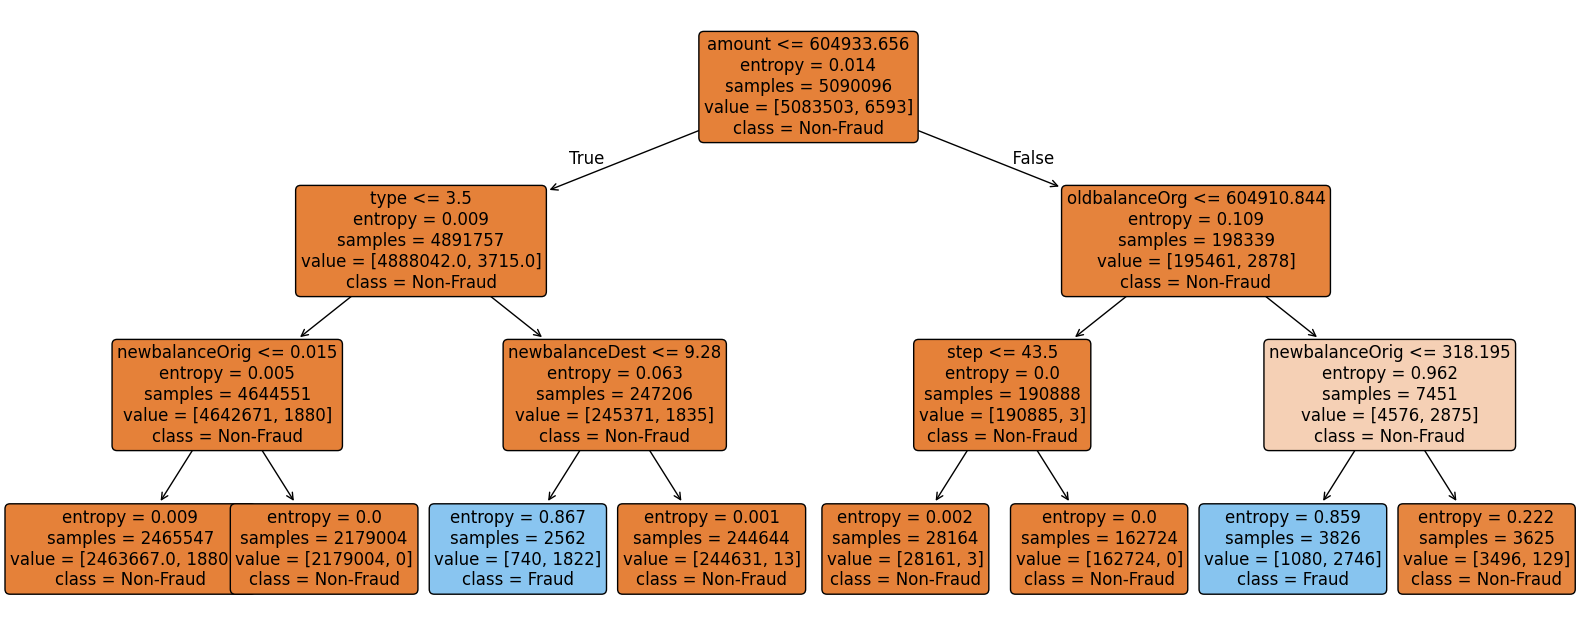

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plot_tree(id3_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Non-Fraud', 'Fraud'],
          rounded=True,
          fontsize=12)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Encode categorical columns with LabelEncoder
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

# Define features (X) and exclude the target variables
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])  # Remove target columns

# Scale the features to standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check if scaling worked
print(X_scaled[:5])  # Show the first 5 scaled rows


[[-1.70304158  0.95239932 -0.28155992 -1.31882479 -0.22981004 -0.2376217
   1.22048984 -0.3238139  -0.33341141]
 [-1.70304158  0.95239932 -0.29476726 -0.53851997 -0.28135938 -0.2858123
   1.31623184 -0.3238139  -0.33341141]
 [-1.70304158  1.69307616 -0.2975548  -1.18563042 -0.28865378 -0.29244171
  -0.40885558 -0.3238139  -0.33341141]
 [-1.70304158 -0.52895436 -0.2975548   1.44574227 -0.28865378 -0.29244171
  -0.47281998 -0.31758239 -0.33341141]
 [-1.70304158  0.95239932 -0.27853189  0.14683396 -0.27432915 -0.28222099
   0.10995329 -0.3238139  -0.33341141]]


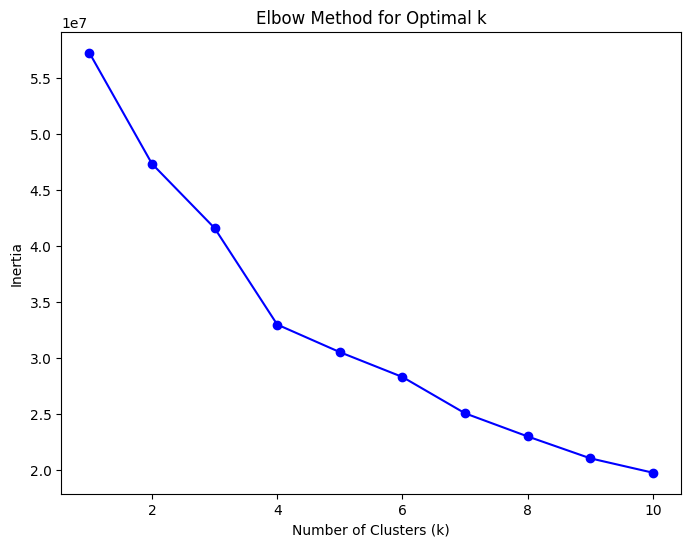

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method to find the optimal number of clusters
inertia = []

# Try different values of k (e.g., from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia against k to find the "elbow"
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Fit K-Means with the optimal number of clusters (let's say it was 3 from the Elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

# Inspect the clustering result (first 5 rows)
print(df.head())


   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3   9839.64    757869       170136.0       160296.36   1662094   
1     1     3   1864.28   2188998        21249.0        19384.72   1733924   
2     1     4    181.00   1002156          181.0            0.00    439685   
3     1     1    181.00   5828262          181.0            0.00    391696   
4     1     3  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  Cluster  
0             0.0             0.0        0               0        1  
1             0.0             0.0        0               0        1  
2             0.0             0.0        1               0        1  
3         21182.0             0.0        1               0        0  
4             0.0             0.0        0               0        1  


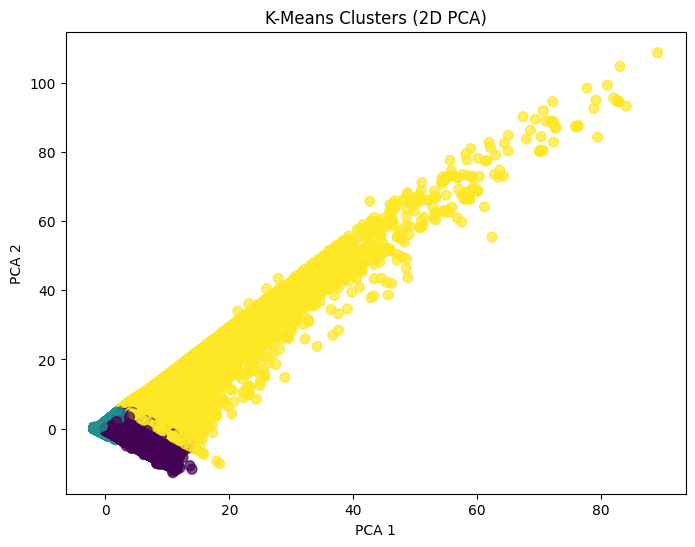

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.title("K-Means Clusters (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
